## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [17]:
# TODO - your code!
#1. Generate and numerically represent a confidence interval
#need sample mean, and std
#we are going to look at the frequecy of non-voting. if the 


435

In [94]:
### resuse from 
from scipy import stats
import pandas as pd      #probably can do this all without dataframes but im feeling lazy
import numpy as np
import re
    
start = re.compile("7.\sAttribute")
pat = re.compile(r'\s+\d+.\s([A-Za-z-\s]+):\s\d\s')  #extract column names
columns=[]
with open('house-votes-84.names', 'r') as f:
    line = f.readline()
    cnt = 1
    while line:
        if start.match(line):
            line = f.readline()  #read next line and process. until done and break
            while pat.match(line):
                line = f.readline()  #read next line and process.
                
        else:
            line = f.readline() #not started, read nextline
            cnt += 1

with open('house-votes-84.names', 'r') as f:
    txt = f.read()
    columns = pat.findall(txt)                   #this is what we want
df= pd.read_csv('house-votes-84.data', names=columns)
df = df.replace({"y": 1, "n": 0 ,"?": 0})

def confidence_interval(data, confidence=0.95):            #stolen from rallred. 
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

print(df[df['Class Name'] == 'republican'].mean())  #have a look at the means

rep = df[df['Class Name'] == 'republican']

lb, xb, ub = confidence_interval(rep['crime'], 0.95)
print(lb)
print(xb)
print(ub)


#bs_marg =  pd.crosstab(df['Class Name'], df['issue'], margins=all)
#bs_marg.shape
#row_sums= obs_marg.iloc[0:2, 0:17].values
#row_sums= obs_marg.iloc[0:2, 0:17].values

handicapped-infants                       0.184524
water-project-cost-sharing                0.446429
adoption-of-the-budget-resolution         0.130952
physician-fee-freeze                      0.970238
el-salvador-aid                           0.934524
religious-groups-in-schools               0.886905
anti-satellite-test-ban                   0.232143
aid-to-nicaraguan-contras                 0.142857
mx-missile                                0.113095
immigration                               0.547619
synfuels-corporation-cutback              0.125000
education-spending                        0.803571
superfund-right-to-sue                    0.809524
crime                                     0.940476
duty-free-exports                         0.083333
export-administration-act-south-africa    0.571429
dtype: float64
0.904329563030822
0.9404761904761905
0.9766228179215589


count    168.000000
mean       0.940476
std        0.237310
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: crime, dtype: float64


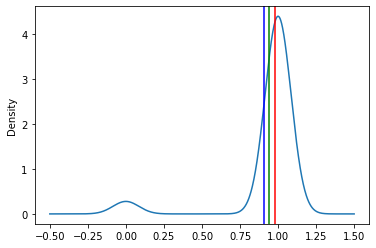

In [103]:
#2. Graphically (with a plot) represent the confidence interval
import matplotlib.pyplot as plt
#rep.plot.density()
print(rep.crime.describe())
rep.crime.plot.density()
plt.axvline(x=lb, color= 'blue')
plt.axvline(x=ub, color='red')
plt.axvline(x=xb, color = 'green')
plt.show()


In [ ]:
#3. Interpret the confidence interval - what does it tell you about the data and its distribution?

# since there are only 2 possible values, 1 or 0 
# the sample mean .is .94 very close to 1. the std is also pretty small, leading to a narrow confidence interval. 
# this implies that the population mean is very highly likely to be within this interval. its not centered on 
# the mean because there are only 0, 1 values in the sample. 

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [149]:
from scipy.stats import chisquare  # One-way chi square test
# we are
cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
ch = [   'price',
   'maint_cost',
   'doors',
   'persons',
   'lug_boot',
   'safety',
   'class']
cars.columns =ch
cars = cars.replace(to_replace={'vgood': '5-vgood', 'good': '4-good','acc': '3-acc','unacc': '2-uncacc'})
cars = cars.replace(to_replace={'vhigh': '5-vhigh', 'high': '4-high','med': '3-med','small': '2-small','low': '1-low'})


observed = pd.crosstab(cars['class'], cars['lug_boot'])

obs_margins = pd.crosstab(cars['class'], cars['lug_boot'], margins =True)
row_sums = obs_margins.iloc[0:4, 3:4].values
row_sums = row_sums.T[0]
col_sums = obs_margins.iloc[4:5, 0:3].values
col_sums = col_sums[0]
grand_total= cars.shape[0]

##calculate exp
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/grand_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

chi2 = ((observed - expected)**2 / expected).sum().sum()
print(chi2)

observed.shape  
dof = 6
p_val= 0.05
## lets see if this is 'right'
chi2, p_val , dof, expected = stats.chi2_contingency(observed)
print(" chi2 statistic", chi2)
print("\n p-value", p_val)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

(4, 3)
[[403.33333333 403.33333333 403.33333333]
 [128.         128.         128.        ]
 [ 23.          23.          23.        ]
 [ 21.66666667  21.66666667  21.66666667]]
53.28202539802095
 chi2 statistic 53.28202539802095

 p-value 1.0294402753134833e-09

 degrees of freedom 6

 expected frequencies table: 
 [[403.33333333 403.33333333 403.33333333]
 [128.         128.         128.        ]
 [ 23.          23.          23.        ]
 [ 21.66666667  21.66666667  21.66666667]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)